**Распознавание птиц по голосам**

***Демонстрационный проект***  
*Автор: Касенко Андрей*  
*Дата: 12.12.2025*

---

## О проекте
Модель предназначена для распознавания птиц по их пению. Модель распознает только африканских птиц. В предоставляемом с моделью файле bird_labels.json названия 264 африканских птиц.

## Что умеет:
1. Загружать аудиофайлы с пением птиц
2. Определять вид птицы с 70%-й вероятностью
3. Показывать топ-3 наиболее вероятных вида
4. Сохранять результаты в файл

## Важно:
- Модель обучена только на **африканских птицах**
- Используйте чистые записи без шума
- Оптимальная длина: 5-10 секунд

## Как запускать:
1. Откройте birds_demo.ipynb в Google Colab
2. Нажмите "Выполнить все"
3. Загрузите аудиофайл

Загружаю словарь птиц....
✅ Загружено 164 названий птиц
🔄 Загружаем модель распознавания птиц...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

Device set to use cpu


Модель успешно загружена!
Модель знает 264 видов птиц

 Коды птиц по международной классификации и их перевод на человеческий язык:
  abethr1 → {'scientific': 'Cichladusa arquata', 'english': 'Collared Palm-thrush', 'russian': 'Ошейниковый пальмовый дрозд'}
  abhori1 → {'scientific': 'Phoeniculus purpureus', 'english': 'Green Wood Hoopoe', 'russian': 'Зелёный древесный удод'}
  afpfly1 → {'scientific': 'Melaenornis edolioides', 'english': 'Northern Black Flycatcher', 'russian': 'Северная чёрная мухоловка'}
  gobsta5 → {'scientific': 'Onychognathus morio', 'english': 'Red-winged Starling', 'russian': 'Краснокрылый скворец'}
  gobwea1 → {'scientific': 'Ploceus ocularis', 'english': 'Spectacled Weaver', 'russian': 'Очковый ткач'}
Загрузите аудиофайл:


Saving XC459482 - Африканский удод - Upupa africana.mp3 to XC459482 - Африканский удод - Upupa africana.mp3

🎵 XC459482 - Африканский удод - Upupa africana.mp3:


/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:6044: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


⏱️  Длительность: 30.8 сек
📡 Частота: 44100 Hz


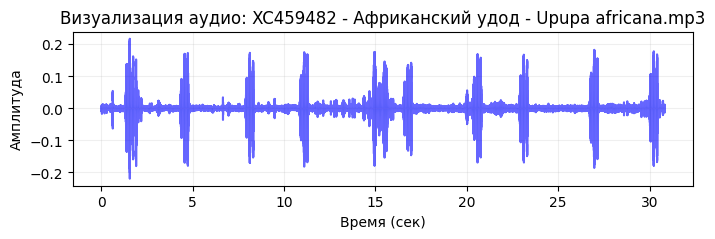

- ['Черноголовая славка']: 25.3%
- {'scientific': 'Milvus migrans', 'english': 'Black Kite', 'russian': 'Чёрный коршун'}: 10.1%
- {'scientific': 'Buteo buteo', 'english': 'Common Buzzard', 'russian': 'Обыкновенный канюк'}: 7.4%


In [2]:
# 1. Загружаем необходимые библиотеки
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import librosa
from transformers import pipeline
from google.colab import files
from IPython.display import display, Audio, HTML

# 2. Загружаем словарь
print("Загружаю словарь птиц....")
with open('bird_labels.json', 'r', encoding='utf-8') as f:
    bird_names = json.load(f)
print(f"✅ Загружено {len(bird_names)} названий птиц")

# 3. Загрузка модели с некоторыми пояснениями
print("Загружаю модель распознавания птиц по их пению..")

try:
    model = pipeline("audio-classification", model="saadashraf/birds_model")
    print("Модель успешно загружена!")
    print(f"Модель знает {len(model.model.config.id2label)} видов птиц")

    # Примеры кода птицы и описание
    print("\n Коды птиц по международной классификации и их перевод на человеческий язык:")
    codes = list(model.model.config.id2label.values())[:5]
    for code in codes:
        name = bird_names.get(code, "?")
        print(f"  {code} → {name}")

except Exception as e:
    print(f"❌ Ошибка загрузки модели: {e}")
    print("\n Проверьте интернет соединение")
# 4. Загружаем аудио. Можно с ресурса xeno-canto.org скачать записи голосов птиц
print("Загрузите аудиофайл:")
uploaded = files.upload()

# 6. Анализируем
for filename in uploaded.keys():
    print(f"\n{filename}:")
    filepath = f"/content/{filename}"
    results = model(f"/content/{filename}")

    try:
        y, sr = librosa.load(filepath, sr=None)
        duration = len(y)/sr

        print(f"Длительность: {duration:.1f} сек")
        print(f"Частота: {sr} Hz")

        # Простая визуализация
        plt.figure(figsize=(8, 2))
        plt.plot(np.linspace(0, duration, len(y)), y, color='blue', alpha=0.6)
        plt.fill_between(np.linspace(0, duration, len(y)), y, alpha=0.3)
        plt.title(f"Визуализация аудио: {filename}")
        plt.xlabel("Время (сек)")
        plt.ylabel("Амплитуда")
        plt.grid(True, alpha=0.2)
        plt.show()

    except Exception as erx:
        print(f"Не удалось проанализировать аудио: {erx}")

for res in results[:3]:
    code = res['label']
    name = bird_names.get(code, code)
    print(f"- {name}: {res['score']*100:.1f}%")